In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

C:\Users\TUSKIE\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [20]:
dataset = pd.read_csv("arg/argentina.csv")
dataset.head()

,province,gdp,illiteracy,poverty,deficient_infra,school_dropout,no_healthcare,birth_mortal,pop,movie_theatres_per_cap,doctors_per_cap
0,Buenos Aires,2.926899e+08,1.38324,8.167798,5.511856,0.766168,48.7947,4.4,15625084,0.000006,0.004836
1,Catamarca,6.150949e+06,2.34414,9.234095,10.464484,0.951963,45.0456,1.5,367828,0.000005,0.004502
2,Córdoba,6.936374e+07,2.71414,5.382380,10.436086,1.035056,45.7640,4.8,3308876,0.000011,0.010175
3,Corrientes,7.968013e+06,5.60242,12.747191,17.438858,3.864265,62.1103,5.9,992595,0.000004,0.004495
4,Chaco,9.832643e+06,7.51758,15.862619,31.479527,2.577462,65.5104,7.5,1055259,0.000003,0.003605


In [4]:
dataset.isna().sum()

province                  0
gdp                       0
illiteracy                0
poverty                   0
deficient_infra           0
school_dropout            0
no_healthcare             0
birth_mortal              0
pop                       0
movie_theatres_per_cap    0
doctors_per_cap           0
dtype: int64

In [5]:
dataset.province.unique()

array(['Buenos Aires', 'Catamarca', 'Córdoba', 'Corrientes', 'Chaco',
       'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tucumán'], dtype=object)

In [ ]:
prov = ['Buenos Aires', 'Catamarca', 'Córdoba', 'Corrientes', 'Chaco',
       'Chubut', 'Entre Ríos', 'Formosa', 'Jujuy', 'La Pampa', 'La Rioja',
       'Mendoza', 'Misiones', 'Neuquén', 'Río Negro', 'Salta', 'San Juan',
       'San Luis', 'Santa Cruz', 'Santa Fe', 'Santiago del Estero',
       'Tucumán']
dataset['province'] = dataset['province'].

In [21]:
features= dataset.drop(['province'],axis=1)
labels = pd.get_dummies(dataset['province'])

In [22]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
k_means = KMeans(
    init = "random",
    n_clusters=22,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [13]:
k_means.fit(scaled_features)

KMeans(init='random', n_clusters=22, random_state=42)

In [14]:
# The lowest SSE value
k_means.inertia_



# The number of iterations required to converge
k_means.n_iter_

1

In [15]:
# Final locations of the centroid
k_means.cluster_centers_

array([[ 4.33927214e+00, -1.01844951e+00, -4.76036185e-01,
        -1.01624113e+00, -8.51463080e-01, -2.20083304e-01,
        -1.71556357e-01,  4.43090353e+00, -2.63959622e-01,
        -3.90691064e-02],
       [-1.32312543e-01, -7.08591844e-01, -1.27006909e-01,
        -1.99977216e-01, -2.94297842e-01, -2.25835844e-01,
        -4.93390763e-01, -3.60825913e-01,  4.50721706e-01,
         1.16202840e-01],
       [-3.98482493e-01, -5.93805584e-01,  9.32218457e-01,
        -2.75318638e-02, -8.91317485e-01,  3.78225454e-01,
        -3.76360070e-01, -3.22031000e-01, -9.76649662e-01,
        -6.29193629e-01],
       [-4.04011254e-01, -4.87250722e-01, -1.87272722e-01,
        -3.13833612e-01, -6.86450250e-01, -6.38045472e-01,
        -1.02002888e+00, -4.19137965e-01, -3.99368002e-01,
        -2.63350130e-01],
       [-2.83369675e-01,  6.66410768e-02,  1.88073810e+00,
         2.13446766e-01, -2.15673748e-01,  1.07627835e+00,
         2.38051069e-01, -1.50013020e-01, -7.08308734e-01,
        -6.

In [17]:
k_means.labels_

array([ 0,  3, 14,  8,  9,  5, 21, 17,  2, 15, 18,  7, 11,  1, 19,  4, 13,
       10, 12, 20,  6, 16])

# Star classification

In [37]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [53]:
dt = pd.read_csv("stellar/star_classification.csv")
colnames=dt.columns


In [54]:
dt['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

In [56]:
#dt['class'] = pd.get_dummies(dt['class'])
dt['class']= dt['class'].map({'GALAXY':0, 'STAR':1, 'QSO':2})
dt.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [32]:
dt.isna().sum()
dt.co

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

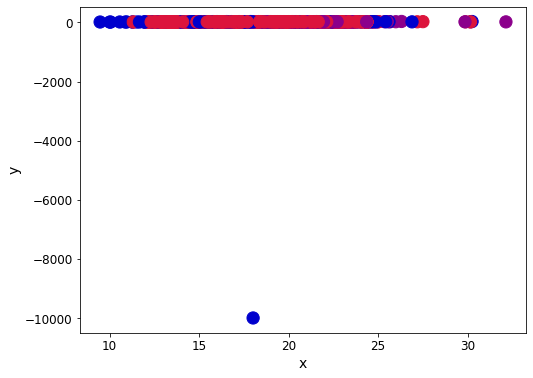

In [75]:
customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x=dt['i'], y=dt['u'], s=150,
            c=dt['class'].astype('category'), 
            cmap = customcmap)
ax.set_xlabel(r'x', fontsize=14)
ax.set_ylabel(r'y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [60]:
def initiate_centroids(k, dset):
    '''
    select k data points as centroids
    k: number of centroids
    dset: pandas dataframe
    '''
    
    centroids = dset.sample(k)
    return centroids

np.random.seed(42)
k=3
df= dt.drop(['class','obj_ID','run_ID','rerun_ID','field_ID','spec_obj_ID','fiber_ID'],axis=1)
centroids = initiate_centroids(k,df)
centroids

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
75721,16.956890,3.646130,23.33542,21.95143,20.48149,19.60300,19.13094,6,0.506237,4312,55511
80184,240.063240,6.134131,17.86033,16.79228,16.43001,16.30923,16.25873,1,0.000345,2175,54612
19864,30.887222,1.188710,18.18911,16.89469,16.42161,16.24627,16.18549,1,0.000004,7332,56683


In [63]:
df.columns

Index(['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift',
       'plate', 'MJD'],
      dtype='object')

In [64]:
from sklearn.cluster import KMeans

import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# The random_state needs to be the same number to get reproducible results
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(scale, columns=['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift',
       'plate', 'MJD']);
df_scale.head(5)

,alpha,delta,u,g,r,i,z,cam_col,redshift,plate,MJD
0,0.376905,0.503802,0.999113,0.999070,0.535344,0.427665,0.998944,0.2,0.091831,0.451592,0.648007
1,0.402286,0.491812,0.999202,0.999126,0.646203,0.515986,0.999225,0.8,0.112389,0.828841,0.894320
2,0.394960,0.534139,0.999251,0.999109,0.546218,0.435729,0.998959,0.2,0.093170,0.350949,0.543965
3,0.940947,0.180600,0.998939,0.999220,0.596946,0.486717,0.998990,0.4,0.134210,0.723312,0.878072
4,0.959118,0.392679,0.998670,0.998602,0.337999,0.287021,0.998620,0.4,0.017959,0.476753,0.625205


In [65]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df)
y_predicted

array([2, 1, 2, ..., 0, 2, 1])

In [66]:
km.cluster_centers_


array([[1.72900417e+02, 2.22653519e+01, 2.02324299e+01, 1.86223032e+01,
        1.77698179e+01, 1.73574461e+01, 1.70979182e+01, 3.50171364e+00,
        1.74713542e-01, 1.62951945e+03, 5.32508130e+04],
       [1.64969415e+02, 2.65117230e+01, 2.26672463e+01, 2.18161964e+01,
        2.10107361e+01, 2.04488242e+01, 2.01139892e+01, 3.53244564e+00,
        9.24276076e-01, 8.75576477e+03, 5.75943725e+04],
       [1.90480059e+02, 2.37803380e+01, 2.27788528e+01, 2.10095118e+01,
        2.00401269e+01, 1.93691407e+01, 1.87765207e+01, 3.50364927e+00,
        6.20544276e-01, 5.08885497e+03, 5.58557422e+04]])

<AxesSubplot: xlabel='redshift', ylabel='plate'>

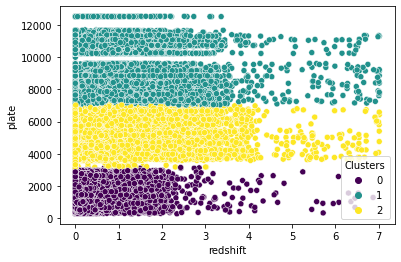

In [70]:


df['Clusters'] = km.labels_
sns.scatterplot(x="redshift",y="plate", hue = 'Clusters',  data=df,palette='viridis')

# Finding optimum  number of clusters in k means